In [157]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import missingno as msno


In [158]:
# data import
train_df = pd.read_csv('./train_data.csv')
test_df = pd.read_csv('./test_data.csv')
target_col = 'SalePrice'

<AxesSubplot: >

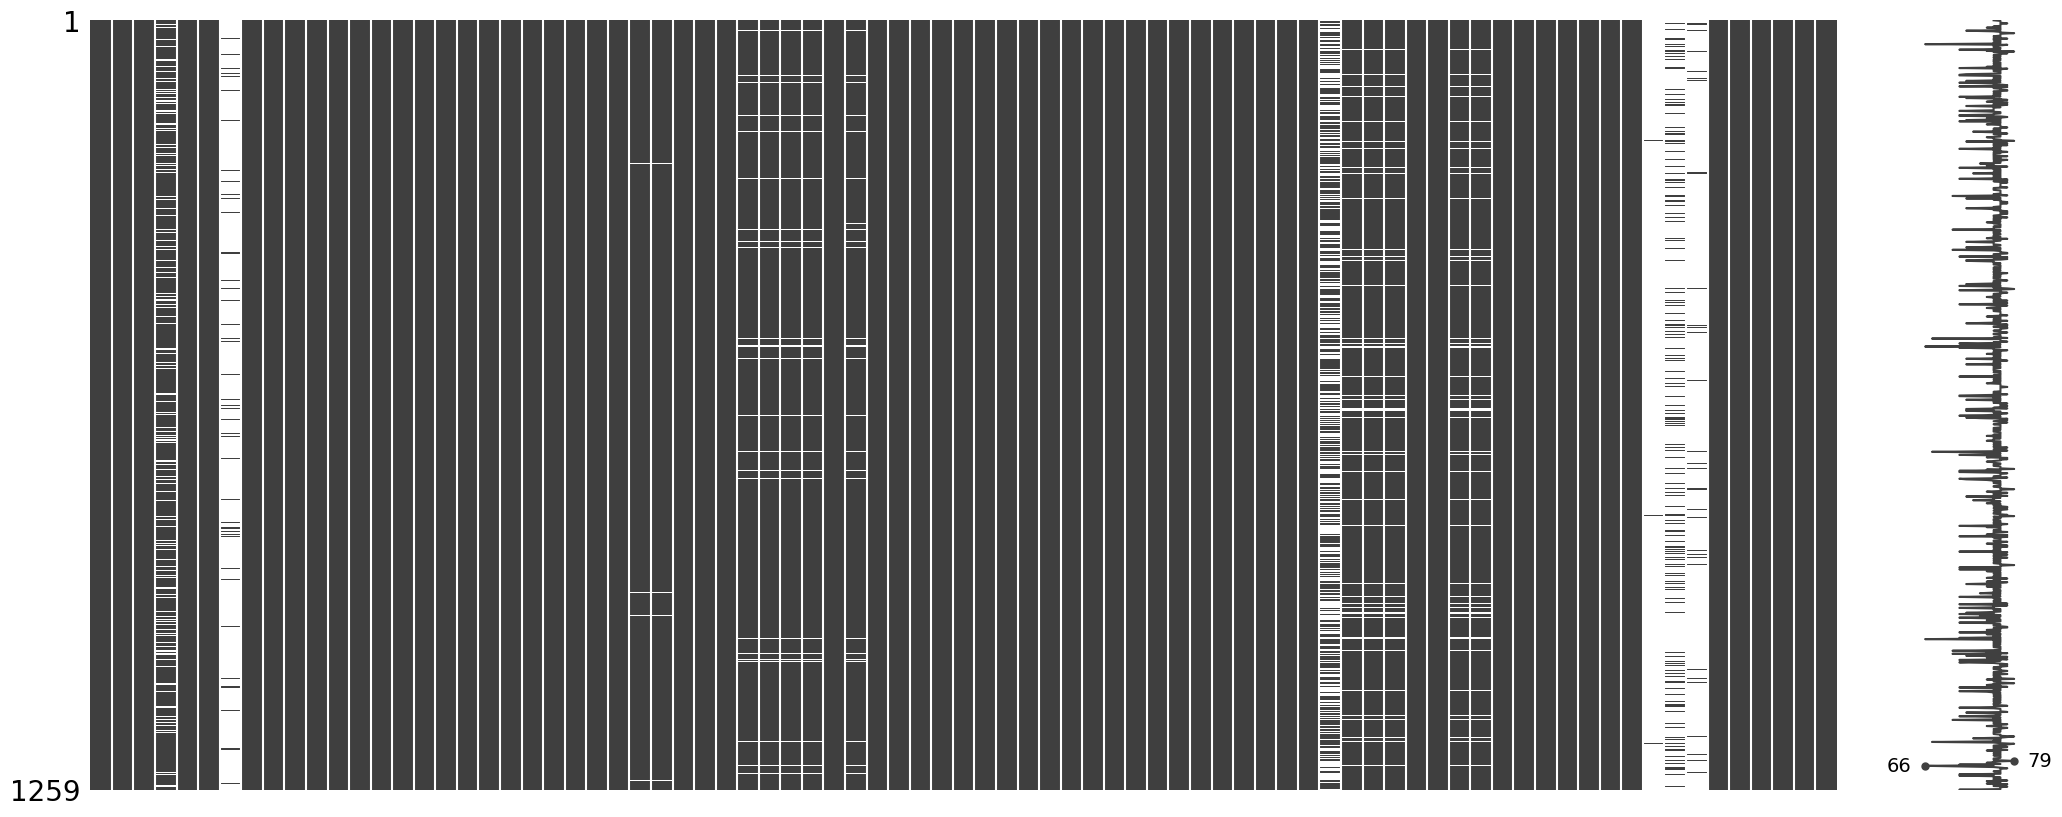

In [159]:
# visualization
msno.matrix(train_df)

In [160]:
## calculate correleation
## C1
corr_train=train_df.corr()
corrs=corr_train['SalePrice'].drop('SalePrice')


#### correleation heatmap and plot 
#fig, ax = plt.subplots(figsize=(20,20))
#sns.heatmap(pd.DataFrame(corrs), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
#plt.xticks(rotation=90)
#plt.show()

# Find the columns that have a correlation with the target column below the threshold
print("before----",train_df.shape)
threshold=0.16
low_corr_cols = [col for col in corrs.index if abs(corrs[col]) <= threshold]
train_df.drop(columns=low_corr_cols, axis=1, inplace=True)
test_df.drop(columns=low_corr_cols, axis=1, inplace=True)
print(train_df.shape)
print(test_df.shape[1])

before---- (1259, 81)
(1259, 67)
66


C:\Users\houssam\AppData\Local\Temp\ipykernel_11960\3790001833.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train=train_df.corr()


In [161]:
## handling NA values
## replace NA values with NO if column is not numerical
## replace NA values with -1 if column is numerical
## C1
def find_na_columns(df):
    na_columns = df.columns[df.isna().any()].tolist()
    replacement_dict = {}
    for col in na_columns:
        if df[col].dtype == 'object':
            replacement_dict[col] = 'NO'
        else:
            replacement_dict[col] = -1
    return replacement_dict
na_columns_dict_train = find_na_columns(train_df)
na_columns_dict_test= find_na_columns(test_df)
train_df.fillna(na_columns_dict_train,inplace=True)
test_df.fillna(na_columns_dict_test,inplace=True)

In [162]:
####### handling time/ year columns  
### switch year columns to age to make more sense
## preprocessing 3
yr_cols = train_df.filter(regex='Yr|Year').columns
current_year = datetime.datetime.now().year
for i in yr_cols:
    train_df[f'{i}_age'] = current_year - train_df[i]
    test_df[f'{i}_age'] = current_year - train_df[i]
train_df.drop(columns=yr_cols,axis=1,inplace=True)
test_df.drop(columns=yr_cols,axis=1,inplace=True)

In [163]:
## put all numerical columns and categorical columns in a list
int_columns =[]
cat_columns=[]
for col in train_df.columns:
    if(train_df[col].dtype=='object'):
        cat_columns.append(train_df[col].name)
    if('age' in train_df[col].name or train_df[col].name == target_col):
        continue
    if (train_df[col].dtype == 'int64' or train_df[col].dtype == 'float64'):
        int_columns.append(train_df[col].name)
print(train_df.shape[1])

print(test_df.shape[1])

67
66


In [164]:
## feature scalling preprocessing 4
def scale_features(df, feature_cols):
    scaler = StandardScaler()
    df_scaled = df.copy()
    
    for col in feature_cols:
        scaler.fit(df[[col]])
        df_scaled[col] = scaler.transform(df[[col]])
    return df_scaled

In [165]:
## splitting the target variable from the DF
X_Train = train_df.drop(target_col, axis=1)
Y_Train = train_df[target_col]

In [166]:
X_train_scaled = scale_features(X_Train, int_columns)
X_test_scaled = scale_features(test_df,int_columns)
print(X_train_scaled.shape[1])
print(X_test_scaled.shape[1])

66
66


In [167]:
# Decide which categorical variables you want to use in model
categorical_col_names=[]
for col_name in X_train_scaled.columns:
    if X_train_scaled[col_name].dtypes == 'object':
        categorical_col_names.append(col_name)
        unique_cat = len(X_train_scaled[col_name].unique())
        #print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

<AxesSubplot: >

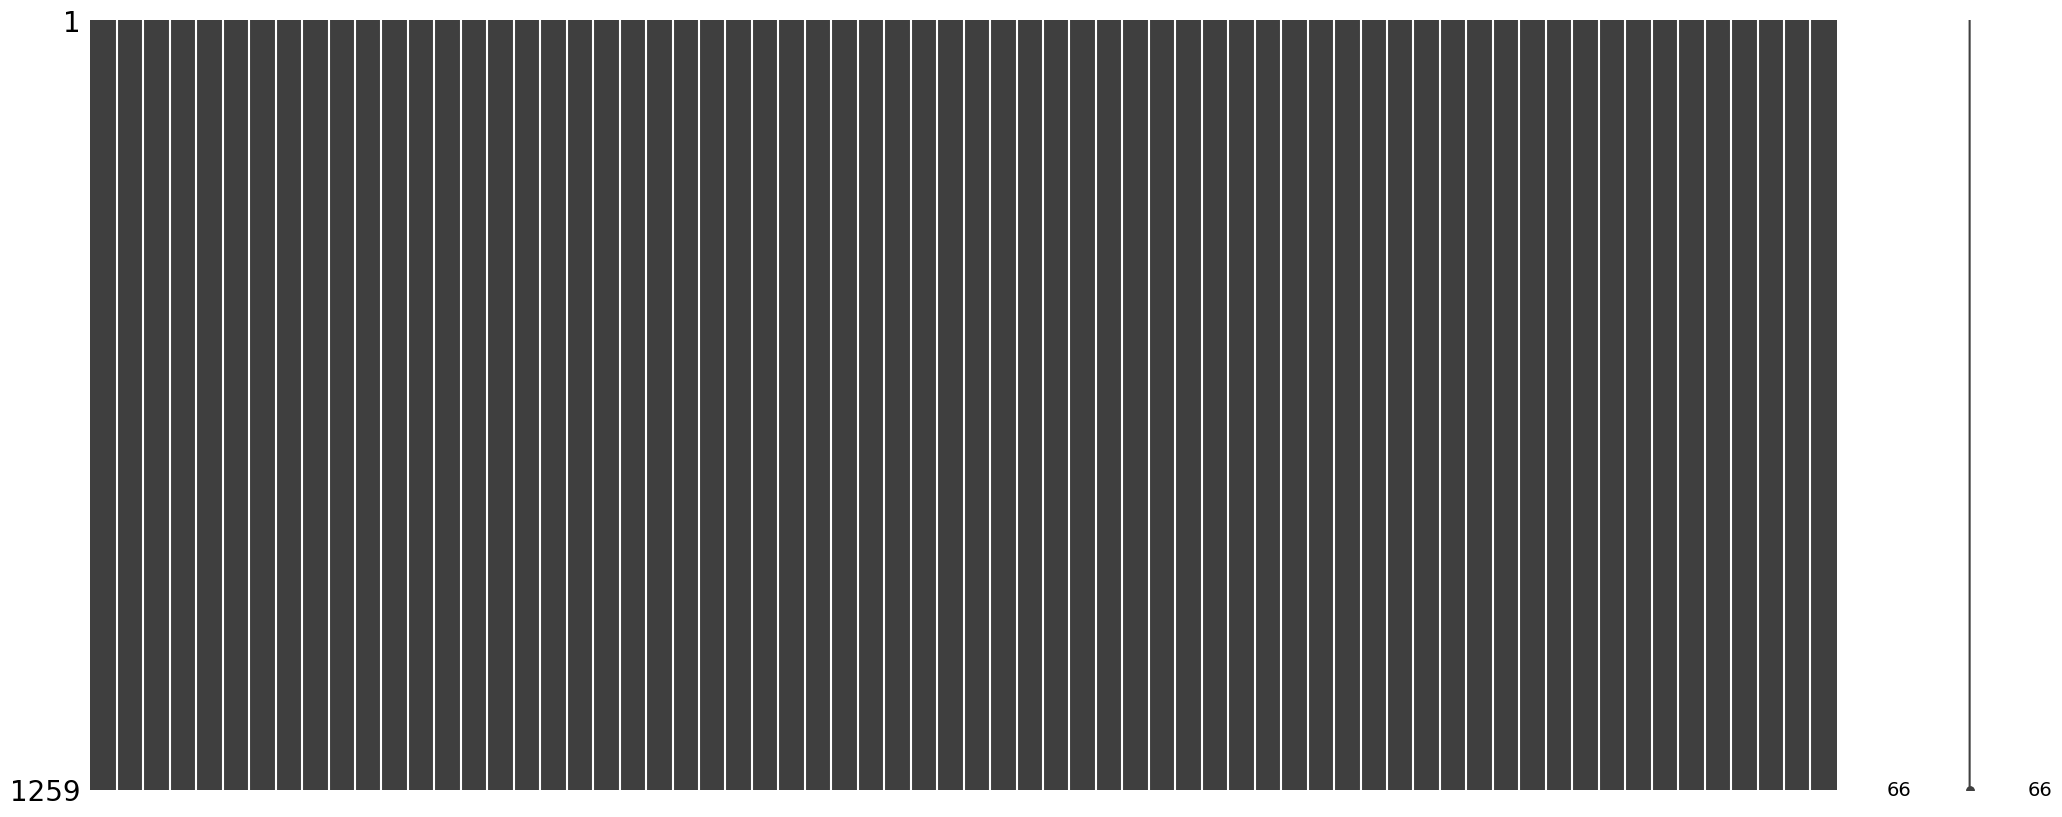

In [168]:
### preprocessing 5
def label_encode_features(dataframe, columns_to_encode):
    le = LabelEncoder()
    for col in columns_to_encode:
        dataframe[f'{col}_indexed'] = le.fit_transform(dataframe[col])
    dataframe.drop(columns=columns_to_encode, axis=1, inplace=True)

label_encode_features(X_train_scaled,categorical_col_names)
label_encode_features(X_test_scaled,categorical_col_names)
##
msno.matrix(X_train_scaled)

#X_train_scaled.to_csv('./train_data_after_processing.csv')
#X_test_scaled.to_csv('./test_data_after_processing.csv')

In [169]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, Y_Train)
y_pred = rf.predict(X_test_scaled)
# Evaluate the model performance
accuracy = rf.score(X_train_scaled, Y_Train)
print(f"Model accuracy: {accuracy}")

predictions on random forest [151500 190000 151500 125000 151500 124000 168500  79900 136500 190000
 151500 144000 137000 119500 151500 116000  95000 151500 190000 190000
 129500 145000 165000 128000 151500 130000 115000 171000 175000 118000
 205000 151500 118000 137000 205950 110000 119500 145000 124000 745000
 151500 225000 151500 260000 190000 130000 426000 202665 118000 174900
 173000 137000 210000 290000 260000 118000 190000 233230 187750 190000
 126000  60000 120500 225000 109500 250000  60000 124000 110000 225000
 190000 279500 148000 120500  79500 124000 145000 143000  80000 190000
 100000 124500 147000 205000 127500 160000 127000 190000 190000 190000
  79000 154300 150000 151500 290000 230000 225000 151500 151500 177000
 233230 142953 187500 136900 161000 151000  95000 145000  97000 140000
 175500 133000 153000 205000 150000 233230 205000 120500 145000 124000
 151500  79500 190000 155000 190000 151500 118000 239000 125000 225000
 134000 217000 145000 115000 151500 124000 22600

In [170]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train_scaled, Y_Train)
predictions = model.predict(X_test_scaled)
print("predictions on linear regression",predictions)

predictions on linear regression [171184.61052262 182428.02229197 140607.85945225 129880.38712542
 182062.42688822 156339.1817053  188758.37196987 191656.39704682
 314741.05844667 327649.11397528 150959.06301685 283341.14789856
 168932.0260505  139322.23857151 186230.74252546 147262.42838733
 188804.09352073 167190.03497387 219252.47987523 245116.92743324
 120581.83300842 201730.05939031 201500.95554785 153402.30894727
 166522.47519074 217293.17310266 144479.54067623 191953.25182626
 188408.84491581 236643.28943558 303218.42731365 159000.93262303
 122809.92534203 163317.89891471 195504.10278767 118586.26402443
 154309.00698652 147792.37153295 131939.79465681 768940.6537892
 159737.99898501 250977.74302472 166907.12422462 296248.44029069
 220425.15546882 174264.91552987 342915.20956738 199287.68080522
 146286.93344464 154503.09420695 183874.6009422  271909.45948046
 198297.36211073 307794.99347988 299031.09814283 114202.01318053
 237475.48233266 284703.2375933  190232.93404306 241907.79